## Esercitazione 8  del    23 Aprile 2024


## Condizionamento del problema della soluzione di un sistema lineare

# APPUNTI

### MATRICE DI VANDERMONDE (A):
- x = (x0, x1, ..., xn)
- Matrice mal condizionata
- A = [[x0^0, x0^1, ..., x0^n], [x1^0, x1^1, ..., x1^n], ..., [xn^0, xn^1, ..., xn^n]]

### RISOLUZIONE DEL SISTEMA Ax=b (con A matrice di VANDERMONDE):
- Dobbiamo trovare b in maniera tale che la soluzione del sistema sia x = (1,...,1)
- Definiamo x_esatta come: x_esatta = (1,1,...,1) Trasposto
- b = A
- b = np.sum(A, axis = 1).reshape(n,1)
- Utilizzare la funzione di scipy:
    - x = scipy.linalg.solve(A,b)
- b_perturbato = b + delta_b (dove delta_b = 0.0025*b)
    - x_perturbato = scipy.linalg.solve(A, b_perturbato)
    
### RELAZIONE DEGLI ERRORI:
- (||delta_x||)/(||x||) = (||x_perturbato - x||)/(||x||) = (||x + delta_x - x||)/(||x||) <= K(A)*(||delta_b||)/(||b||)
    - K(A) = ||A||*||A^(-1)||
    - K(A) = np.linalg.cond(A,1) --> (oppure 2, oppure np.inf per la norma due o per la norma infinito)
    
### RIPASSO:
- ||x|| = np.linalg.norm(x, tipo)


In [2]:
import numpy as np
x = np.arange(-4,4)
# Permette di creare la matrice d9i Vandermonde
A = np.vander(x, increasing=True)
print(A)

[[     1     -4     16    -64    256  -1024   4096 -16384]
 [     1     -3      9    -27     81   -243    729  -2187]
 [     1     -2      4     -8     16    -32     64   -128]
 [     1     -1      1     -1      1     -1      1     -1]
 [     1      0      0      0      0      0      0      0]
 [     1      1      1      1      1      1      1      1]
 [     1      2      4      8     16     32     64    128]
 [     1      3      9     27     81    243    729   2187]]


# ----------------------------------------------------------------------------------------------------------

# Esercizio 1
- Costruire la matrice di Vandermonde A, generata dal vettore x=[1.0,2.0,...,6.0] utilizzando la funzione np.vander(x, increasing=True) di numpy. 
- Calcolarne l'indice di condizionamento in norma infinito senza utilizzare la funzione cond di numpy.linalg e poi confrontarne il valore con quello ottenuto utilizzando la funzione.
- Considerare il sistema lineare Ax=b  con matrice dei coefficienti A e termine noto costruito in maniera tale che la soluzione esatta sia il vettore x=[1,1,1,1,1,1] (ogni sua componente è 1) e risolverlo usando il metodo solve del modulo linalg di Scipy.
- perturbare il vettore dei termini noti della quantità
- 
$$
\delta b = 0.025 \, \ast \,
\left [
\begin{array}{c}
1\\
0\\
0\\
0
\end{array}
\right ]
$$

- Risolvere il sistema con termine noto pertubato $b + \delta b$ ((usando il metodo solve del modulo linalg di Scipy).
- Calcolare l'errore relativo sul termine noto e l'errore relativo sulla soluzione. Cosa si può concludere?

N.B. per il calcolo dell'inversa della matrice di A usare la funzione di numpy.linalg.inv(A).


In [3]:
# IMPORTO LE LIBRERIE FONDAMENTALI:
import numpy as np
import numpy.linalg as npl
import scipy.linalg as spl

In [4]:
# CREAZIONE DELLA MATRICE DI VANDERMONDE:
x = np.arange(1.0,7.0)
A = np.vander(x, increasing = True)
print(A)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01 3.200e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01 2.430e+02]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02 1.024e+03]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02 3.125e+03]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03 7.776e+03]]


In [6]:
# CREO IL VETTORE b DEL TERMINE NOTO:
# np.sum(A, axis = 1) mi restituirebbe un normalissimo vettore, ma a me serve un vettore trasposto
# perciò devo effettuare il reshape (per farlo passare da un vettore riga ad un vettore colonna)
b = np.sum(A, axis = 1).reshape(A.shape[0], 1)
print(b)

[[6.000e+00]
 [6.300e+01]
 [3.640e+02]
 [1.365e+03]
 [3.906e+03]
 [9.331e+03]]


In [7]:
# CALCOLO DELLA SOLUZIONE:
x = spl.solve(A,b)
print(x)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [8]:
# PERTURBAZIONE DEL TERMINE NOTO:
b_perturbato = b.copy()
b_perturbato[0] = b_perturbato[0] + 0.025
x_perturbato = spl.solve(A, b_perturbato)
print(x_perturbato)

[[1.15      ]
 [0.7825    ]
 [1.12083333]
 [0.96770833]
 [1.00416667]
 [0.99979167]]


In [9]:
# MISURAZIONE DELL'ERRORE RELATIVO SUI DATI (sul termine noto):
errore_dati = npl.norm(b_perturbato - b, np.inf)/npl.norm(b, np.inf)
# MISURAZIONE DELL'ERRORE RELATIVO SULLA SOLUZIONE:
errore_soluzione = npl.norm(x_perturbato - x, np.inf)/npl.norm(x, np.inf)
print("Errore relativo sui dati:\n", errore_dati)
print("Errore relativo sulla soluzione:\n", errore_soluzione)

Errore relativo sui dati:
 2.679241238881187e-06
Errore relativo sulla soluzione:
 0.21749999999063319


In [10]:
# La matrice dovrà essere necessariamente una matrice mal condizionata visto che per un piccolo errore sui dati, si viene a formare un errore sui risultati immenso
# Risolvere un sistema lineare con questo tipo di matrice, porta a dei risultati che sono ben lontani da quelli che ci aspetteremmo
KA = npl.cond(A,np.inf)
print("Indice di condizionamento K(A):\n", KA)

Indice di condizionamento K(A):
 1204321.0666666436


# ----------------------------------------------------------------------------------------------------------

## Esercizio 2
Assegnato il sistema lineare $Ax = b$, con
$$
A =
\left [
\begin{array}{ccc}
6 & 63 & 662.2\\
63 & 662.2 & 6967.8\\
662.2 & 6967.8 & 73393.5664
\end{array}
\right ], \qquad
b =
\left [
\begin{array}{c}
1.1\\
2.33\\
1.7
\end{array}
\right ]
$$
- trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
- perturbare la matrice dei coefficienti della quantità
$$
\delta A =
0.01 \, \ast \,
\left [ \begin{array}{ccc}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}
\right ]
$$
quindi calcolare l'errore relativo sulla soluzione e confrontarlo con la
perturbazione relativa sui dati di ingresso. Cosa si osserva?

In [14]:
# CREAZIONE DELLA MATRICE:
B = np.array([[6.0,63.0,662.2],[63.0, 662.2, 6967.8], [662.2, 6967.8, 73393.5664]])
print(B)

[[6.00000000e+00 6.30000000e+01 6.62200000e+02]
 [6.30000000e+01 6.62200000e+02 6.96780000e+03]
 [6.62200000e+02 6.96780000e+03 7.33935664e+04]]


In [15]:
# CREO IL VETTORE b DEL TERMINE NOTO:
b = np.array([1.1,2.33,1.7]).reshape(3, 1)
print(b)

[[1.1 ]
 [2.33]
 [1.7 ]]


In [16]:
# CALCOLO DELLA SOLUZIONE:
x = spl.solve(B,b)
print(x)

[[136422.33746479]
 [-25999.49954686]
 [  1237.44419611]]


In [17]:
# PERTURBAZIONE DELLA MATRICE:
B_perturbato = B.copy()
B_perturbato[0][0] = B_perturbato[0][0] + 0.01
print(B_perturbato)
x_perturbato = spl.solve(B_perturbato, b)
print(x_perturbato)

[[6.01000000e+00 6.30000000e+01 6.62200000e+02]
 [6.30000000e+01 6.62200000e+02 6.96780000e+03]
 [6.62200000e+02 6.96780000e+03 7.33935664e+04]]
[[67.09867276]
 [-9.66739506]
 [ 0.3124175 ]]


In [18]:
# MISURAZIONE DELL'ERRORE RELATIVO ALLA MATRICE:
errore_matrice = npl.norm(B_perturbato - B, np.inf)/npl.norm(B, np.inf)
# MISURAZIONE DELL'ERRORE RELATIVO SULLA SOLUZIONE:
errore_soluzione = npl.norm(x_perturbato - x, np.inf)/npl.norm(x, np.inf)
print("Errore relativo sui dati:\n", errore_dati)
print("Errore relativo sulla soluzione:\n", errore_soluzione)

Errore relativo sui dati:
 2.679241238881187e-06
Errore relativo sulla soluzione:
 0.9995081547933965


In [37]:
# La matrice dovrà essere necessariamente una matrice mal condizionata visto che per un piccolo errore sulla matrice, si viene a formare un errore sui risultati immenso
# Risolvere un sistema lineare con questo tipo di matrice, porta a dei risultati che sono ben lontani da quelli che ci aspetteremmo
KB = npl.cond(B,np.inf)
print("Indice di condizionamento K(B):\n", KB)

Indice di condizionamento K(B):
 19753018830.04029


# ----------------------------------------------------------------------------------------------------------

## Esercizio 3
 
Assegnato il sistema lineare $Ax = b$, con $A$ matrice di Hilbert di ordine
$4$ e $b = [1, 1, 1, 1]^T$,
 - trovare il vettore soluzione $x$ (usando il metodo solve del modulo linalg di Scipy);
 -  perturbare il vettore dei termini noti della quantità
$$
\delta b = 0.01 \, \ast \,
\left [
\begin{array}{c}
1\\
-1\\
1\\
-1
\end{array}
\right ]
$$
quindi calcolare la soluzione del sistema $A x_p= b_p$ con termine noto $b_p=b+ \delta b$.
Calcolare l'errore relativo sulla soluzione e confrontarlo con la perturbazione relativa sui dati di ingresso. Cosa si osserva?

Nota: per la costruzione della matrice di Hilbert usare la funzione hilbert(n) del modulo scipy.linalg
(scipy.linalg.hilbert(n))  dove bisogna specificare l'ordine n della matrice.

### APPUNTI ESERCIZIO 3
- La matrice di Hilbert è una matrice di Hilbert è una matrice quadrata con componenti ℎ𝑖𝑗=(𝑖+𝑗−1)^(−1)
- Si può costruire mediante il metodo scipy.linalg.hilbert(n) dove n specifica il grado

In [38]:
# CREAZIONE DELLA MATRICE:
C = spl.hilbert(4)
print(C)

[[1.         0.5        0.33333333 0.25      ]
 [0.5        0.33333333 0.25       0.2       ]
 [0.33333333 0.25       0.2        0.16666667]
 [0.25       0.2        0.16666667 0.14285714]]


In [39]:
# CREO IL VETTORE b DEL TERMINE NOTO:
b = np.array([1.1, 1, 1, 1]).reshape(4, 1)
print(b)

[[1.1]
 [1. ]
 [1. ]
 [1. ]]


In [40]:
# CALCOLO DELLA SOLUZIONE:
x = spl.solve(C,b)
print(x)

[[  -2.4]
 [  48. ]
 [-156. ]
 [ 126. ]]


In [41]:
# PERTURBAZIONE DEL TERMINE NOTO
perturbazione = (np.array([1.0, -1, 1, -1])*0.01).reshape(4,1)
print("Perturbazione:\n", perturbazione)
print("Termine noto non perturbato:\n", b)
b_perturbato = b.copy()
b_perturbato = b_perturbato + perturbazione
print("Termine noto perturbato:\n", b_perturbato)
x_perturbato = spl.solve(C, b_perturbato)
print("Soluzione perturbata:\n", x_perturbato)

Perturbazione:
 [[ 0.01]
 [-0.01]
 [ 0.01]
 [-0.01]]
Termine noto non perturbato:
 [[1.1]
 [1. ]
 [1. ]
 [1. ]]
Termine noto perturbato:
 [[1.11]
 [0.99]
 [1.01]
 [0.99]]
Soluzione perturbata:
 [[  2.76]
 [ -9.  ]
 [-19.8 ]
 [ 37.8 ]]


In [42]:
# MISURAZIONE DELL'ERRORE RELATIVO SUI DATI (sul termine noto):
errore_dati = npl.norm(b_perturbato - b, np.inf)/npl.norm(b, np.inf)
# MISURAZIONE DELL'ERRORE RELATIVO SULLA SOLUZIONE:
errore_soluzione = npl.norm(x_perturbato - x, np.inf)/npl.norm(x, np.inf)
print("Errore relativo sui dati:\n", errore_dati)
print("Errore relativo sulla soluzione:\n", errore_soluzione)

Errore relativo sui dati:
 0.009090909090909097
Errore relativo sulla soluzione:
 0.8730769230769372


In [43]:
# La matrice dovrà essere necessariamente una matrice mal condizionata visto che per un piccolo errore sui dati, si viene a formare un errore sui risultati immenso
# Risolvere un sistema lineare con questo tipo di matrice, porta a dei risultati che sono ben lontani da quelli che ci aspetteremmo
KC = npl.cond(C,np.inf)
print("Indice di condizionamento K(C):\n", KC)

Indice di condizionamento K(C):
 28374.99999999729


# ----------------------------------------------------------------------------------------------------------

# Metodi diretti per la soluzione numerica di un sistema lineare

### APPUNTI
#### METODO DI GAUSS:
A (n*n), con det(A)!=0, allora esiste una matrice di permutazione P, tale che:
- PA = LU
    - L è una matrice triangolare inferiore
    - U è una matrice triangolare superiore (rij!=0)
- Il sistema PAX = Pb --> LUx = Pb, ottenendo il sistema dato dalle equazioni:
    - Ly = Pb     --> Risolvibile con la funzione Lsolve
    - Ux = y      --> Risolvibile con la funzione Usolve
- PT, L, U = spl.lu(A)
- P  PT.T.copy()

#### METODO DI CHOLESKY:
Se la matrice A è simmetrica e definita positiva, allora:
- A = L*L_trasposta   -->  lij > 0
    - L = spl.cholesky(A, lower = True)
        - Se non scriviamo lower = True ci restituisce L_trasposta
        - Se utilizziamo una matrice A che non è simmetrica allora restituisce un errore
    - LT = L.T
    
#### METODO QR:
Nel caso in cui la matrice A possiede rango massimo, allora:
- A = Q*R
    - Q è una matrice ortogonale (per cui l'inversa coincide con la trasposta)
    - R è una matrice triangolare superiore
- Q,R = spl.qr(A)
- Si ottiene il sistema composta dalle seguenti equazioni:
    - Qy = b     -->    y = Q_trasposta*b
    - Rx = y
    
##### APPUNTI FINALI
L'errore relativo di QR è minore dell'algoritmo di Gauss, perchè l'algoritmo è più stabile 

## Nota 1.
La funzione *scipy.linalg.lu(A)*  , presa in input una matrice A a rango massimo, restituisce in output le matrici $P^T$,L,U,  della fattorizzazione di LU della matrice A in maniera tale che PA=LU (restituisce la matrice di permutazione trasposta)

In [48]:
import numpy as np
import scipy as sp
from scipy.linalg import lu
A=np.array([[2,1],[3,4]])
PT,L,U=lu(A)  #Restituisce in output la trasposta della matrice di Permutazione
P=PT.T.copy()   #P è la matrice di permutazione
print("A=",A)
print("L=",L)
print("U=",U)
print("P=",P)
#LU è la fattorizzazione di P*A (terorema 2)
A1=P@A # equivale al prodotto matrice x matrice np.dot(P,A)
A1Fatt=L@U # equivale a np.dot(L,U)
print("Matrice P*A \n", A1)
print("Matrice ottenuta moltipicando Le ed U \n",A1Fatt)


A= [[2 1]
 [3 4]]
L= [[1.         0.        ]
 [0.66666667 1.        ]]
U= [[ 3.          4.        ]
 [ 0.         -1.66666667]]
P= [[0. 1.]
 [1. 0.]]
Matrice P*A 
 [[3. 4.]
 [2. 1.]]
Matrice ottenuta moltipicando Le ed U 
 [[3. 4.]
 [2. 1.]]


## Nota 2
La funzione *scipy.linalg.cholesky(a, lower=True)*, presa in input una matrice simmetrica e definta positiva restituisce in output la matrice L triangolare inferiore tale che $A=L \cdot L^T$. Se la matrice in input non è definita positiva, restituisce un errore.

In [49]:
from scipy.linalg import cholesky
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
print(A)

[[ 2  1  3]
 [ 1  5  7]
 [ 3  7 12]]


In [50]:
L=cholesky(A,lower=True)
print(L)
A1=L@L.T
print("A1=\n",A1)

[[1.41421356 0.         0.        ]
 [0.70710678 2.12132034 0.        ]
 [2.12132034 2.59272486 0.8819171 ]]
A1=
 [[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


## Nota 3
La funzione *scipy.linalg.qr(a)*, presa in input una matrice A (nxn)  a rango massimo, restituisce in output le matrici Q (ortogonale di dimensione nxn) ed una matrice R (nxn) triangolare superiore tale che $A=Q \cdot R$

In [51]:
from scipy.linalg import qr
A=np.array([[2,1,3],[1,5,7],[3,7,12]])
Q,R=qr(A)
print("Q=",Q)
print("R=",R)
A1=Q@R
print(A1)

Q= [[-0.53452248  0.6882472  -0.49051147]
 [-0.26726124 -0.6882472  -0.67445327]
 [-0.80178373 -0.22941573  0.55182541]]
R= [[ -3.74165739  -7.48331477 -13.09580085]
 [  0.          -4.35889894  -5.50597761]
 [  0.           0.           0.42919754]]
[[ 2.  1.  3.]
 [ 1.  5.  7.]
 [ 3.  7. 12.]]


# ----------------------------------------------------------------------------------------------------------

## Esercizio 4
- si implementi una function LUsolve(P,A,L,U,b) che risolve il sistema lineare Ax=b nel caso di fattorizzazione $PA = LU$ assegnata,
combinando i metodi di risoluzione in avanti ed all'indietro  implementati nel file SolveTriangular.py.
- si testi sulla matrice A = np.array([[2, 5, 8, 7], [5, 2, 2, 8], [7, 5, 6, 6], [5, 4, 4, 8]]) con termine noto b scelto in maniera tale che la soluzione esatta del sistema lineare sia il vettore formato da tutti 1.

In [52]:
# Importo tutte le funzioni del pacchetto SolveTriangular:
from SolveTriangular import *
# Se facevo import SolveTriangular as ST, avrei dovuto usare ST.metodo ovunque
# Facendo in questo modo mi basta scrivere il nome del metodo

In [53]:
def LUSolve(P,L,U,b):
    # Il flag è 1 se è presente un elemento nullo sulla diagonale
    # La funzione esegue questo controllo, ma L non può mai avere valore sulla diagonale uguale a zero
    y, flag = Lsolve(L, P@b)
    if flag == 0:
        x, flag = Usolve(U,y)
    else:
        return None, flag
    
    return x, flag

In [55]:
A = np.array([[2,5,8,7], [5,2,2,8], [7,5,6,6], [5,4,4,8]])
n = A.shape[0]
# Dato che la soluzione deve essere un vettore composto da soli 1, vuol dire che i termini noti sono calcolati come semplice somma
# di tutti i coefficienti della riga corrispondente al termine noto da calcolare (così facendo, si verifica l'uguaglianza della somma
# dei coefficienti moltiplicati per 1, ovvero la semplice somma dei coefficienti, con i termini noti calcolati allo stesso modo)
b = np.sum(A, axis = 1).reshape(n,1)
print(A)
print(b)
PT,L,U = spl.lu(A)
P = PT.T.copy()
x, flag = LUSolve(P,L,U,b)
print("Soluzione:\n", x)

[[2 5 8 7]
 [5 2 2 8]
 [7 5 6 6]
 [5 4 4 8]]
[[22]
 [17]
 [24]
 [21]]
Soluzione:
 [[1.]
 [1.]
 [1.]
 [1.]]


# ----------------------------------------------------------------------------------------------------------

## Esercizio 5
Si implementi una function *solve_nsis(A,B)* per il calcolo della soluzione di un generale sistema lineare $AX = B$, con $X, B$ matrici, che usi la fattorizzazione LU della matrice PA, per risolvere n sistemi lineari: aventi la stessa matrice dei coefficienti A e termine noto l'i-esima colonna della matrice B. 
Utilizzarla poi per il calcolo dell'inversa delle
matrici non singolari
$$
A=\left[
\begin{array}{ccc}
3 & 5 & 7\\
2 & 3 & 4\\
5 & 9 & 11
\end{array}
\right ], \qquad
A=\left[
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -4 & 6 & 8\\
-1 & -2 & -3 & -1\\
5 & 7 & 0 & 1
\end{array}
\right ],
$$
confrontando i risultati ottenuti con l'output
della funzione  *scipy.linalg.inv(A)*

### APPUNTI ESERCIZIO 5:
Risolvere il generale sistema lineare AX=B
- xi è la colonna i-esima di X
- bi è la colonna i-esima di B
    - Axi = bi (per i=1,...,n)
- AX = I   -->   X = A^(-1)
Bisogna scrivere la funzione solve_nsis(A,B)
Fattorizzare A:
- P,L,U   -->  PA = LU
- for (i=1,...,n) {x = LUSolve(P,L,B[:,i] --- \n --- x[:,i] = x --- \n --- return x} 

In [56]:
# DEFINIZIONE DELLA FUNZIONE PER IL CALCOLO DELLA SOLUZIONE DI UN SISTEMA GENERALE LINEARE:
def solve_nsis(A,B):
    n = A.shape[0]
    PT,L,U = spl.lu(A)
    P = PT.T.copy()
    X = np.zeros_like(A)
    for i in range(0,n):
        x, flag = LUSolve(P,L,U,B[:,i])
        if flag != 0:
            return None
        else:
            # Fa in modo di rendere x monodimensionale
            X[:,i] = x.reshape(n,)
    return X

In [61]:
# TEST CON MATRICE NON SINGOLARE 1:
A = np.array([[3.0,5,7],[2,3,4],[5,9,11]])
B = np.eye(3)
X = solve_nsis(A,B)
print("Soluzione\n", X)
print("Soluzione esatta:\n", spl.inv(A))

# TEST CON MATRICE NON SINGOLARE 2:
A2 = np.array([[1.0,2,3,4],[2,-4,6,-8],[-1,-2,-3,-1],[5,7,0,1]])
B2 = np.eye(4)
X2 = solve_nsis(A2,B2)
print("Soluzione\n", X2)
print("Soluzione esatta:\n", spl.inv(A2))

Soluzione
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
Soluzione esatta:
 [[-1.5  4.  -0.5]
 [-1.  -1.   1. ]
 [ 1.5 -1.  -0.5]]
Soluzione
 [[ 5.16666667e-01  1.75000000e-01  8.66666667e-01  2.00000000e-01]
 [-4.16666667e-01 -1.25000000e-01 -6.66666667e-01 -0.00000000e+00]
 [-5.55555556e-03  2.50000000e-02 -2.88888889e-01 -6.66666667e-02]
 [ 3.33333333e-01  0.00000000e+00  3.33333333e-01 -2.31296463e-18]]
Soluzione esatta:
 [[ 0.51666667  0.175       0.86666667  0.2       ]
 [-0.41666667 -0.125      -0.66666667  0.        ]
 [-0.00555556  0.025      -0.28888889 -0.06666667]
 [ 0.33333333  0.          0.33333333  0.        ]]


In [62]:
# Notare che la soluzione corrisponde alla matrice inversa di quella di partenza

# ----------------------------------------------------------------------------------------------------------

## Esercizio 6
Sfruttando la fattorizzazione PA=LU  di una delle matrici del punto precedente, calcolarne il determinante.


In [66]:
A = np.array([[3.0,5,7],[2,3,4],[5,9,11]])
PT,L,U = spl.lu(A)
# Il determinante di A si ottiene come prodotto del determinante della matrice L, per il determinante della matrice U
# ma bisogna tenere conto di un fattore +/-1, dato dalla matrice di permutazione P, che vale +1 o -1 a seconda del numero
# di scambi fatti sulla matrice, durante il processo di fattorizzazione.
# Perciò aggiungiamo al calcolo del determinante il determinante della matrice Ptrasposta (che varrà -1 o +1)
detA = npl.det(L)*npl.det(U)*npl.det(PT)
print("Matrice A:\n", A)
print("Determinante della matrice A calcolato con fattorizzazione LU:\n", detA)
print("Determinante della matrice A reale:\n", npl.det(A))

Matrice A:
 [[ 3.  5.  7.]
 [ 2.  3.  4.]
 [ 5.  9. 11.]]
Determinante della matrice A calcolato con fattorizzazione LU:
 1.9999999999999996
Determinante della matrice A reale:
 1.9999999999999996


# ----------------------------------------------------------------------------------------------------------

## Esercizio 7
Per valori di $n = 4 : 6 : 40$, si consideri il sistema lineare $A_n x = b$ con

$A_n$ matrice di Hankel di ordine $n$ di elementi
$$
a^{(n)}_{i,n+k-i}
=
\left \{
\begin{array}{ll}
2^k & \hbox{se} \ k > 0,\\
2^{1/(2-k)} & \hbox{se} \ k \leq 0,
\end{array}
\right .
\qquad
i = 1, ..., n, \ \  k = i + 1-n, ..., i,
$$
e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Si risolva tale sistema

con il metodo di fattorizzazione LU della matrice PA
e il metodo di fattorizzazione QR (Q,R  =scipy.linalg.qr(A)).
Calcolare gli errori relativi $\| \delta x \|_2/\|x\|_2$ da cui sono affette
le soluzioni calcolate con i due metodi e produrre, al variare di $n$, un
grafico in scala logaritmica ( matplotlib.plyplot.loglog) degli errori relativi calcolati. Che cosa si
osserva?

NB: per il calcolo della matrice di Hankel utilizzare la function 

def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

In [90]:
import matplotlib.pyplot as plt

In [91]:
def Hankel(n):

    A=np.zeros((n,n),dtype=float)
    for i in range(0,n):
        for k in range(i+1-n,i+1):
            if k>0:
                A[i,n-1+k-i]=2.0**(k+1)
            else:
                A[i,n-1+k-i]=2.0**(1/(2-k-1))
    return A

In [92]:
def QRSolve(Q,R,b):
    y = Q.T@b
    x = spl.solve(R,y) 
    return x

Soluzione col metodo QR:
 [[1.]
 [1.]
 [1.]
 [1.]]
Soluzione esatta:
 [[1.]
 [1.]
 [1.]
 [1.]]
Errore relativo LU:
 3.2196467714129406e-15
Errore relativo QR:
 5.7731597280507896e-15
Soluzione col metodo QR:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Soluzione esatta:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Errore relativo LU:
 5.715428130766317e-13
Errore relativo QR:
 1.2572165530846498e-12
Soluzione col metodo QR:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Soluzione esatta:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Errore relativo LU:
 5.1958326528932304e-11
Errore relativo QR:
 4.538280862113961e-11
Soluzione col metodo QR:
 [[1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 

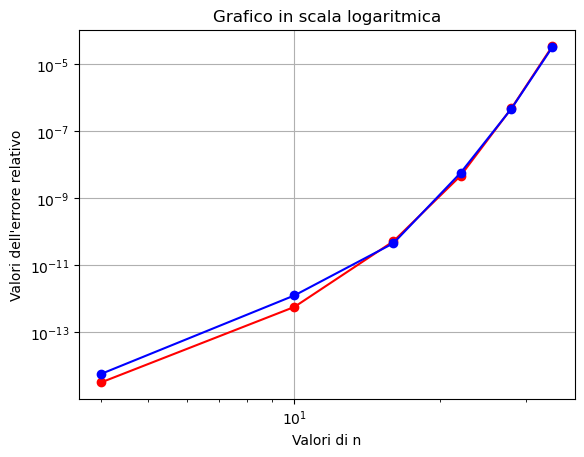

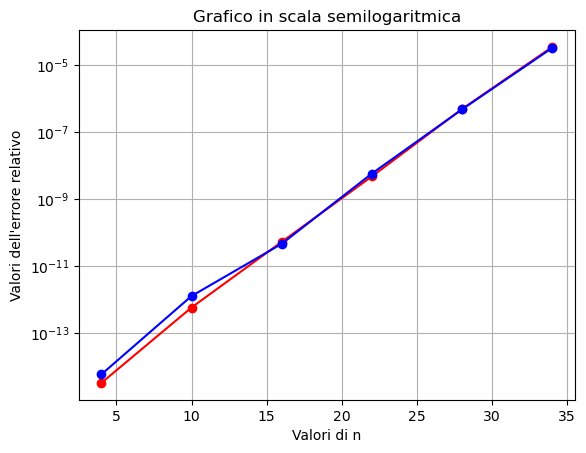

In [126]:
# SOLUZIONE GENERALE:
nv = np.arange(4,40,6)
errLU = []
errQR = []
for n in nv:
    
    # Creazione della matrice:
    A = Hankel(n)
    # print("Matrice di Hankel:\n",A)
    
    # Creazione del termine noto:
    b = np.sum(A, axis = 1).reshape(n, 1)
    # print(b)
    
    # Metodo di fattorizzazione LU:
    PT,L,U = spl.lu(A)
    P = PT.T.copy()
    xLU, flag = LUSolve(P,L,U,b)
    #print("Soluzione con il metodo LU:\n", xLU)
    
    # Metodo di fattorizzazione QR:
    Q,R =spl.qr(A)
    xQR = QRSolve(Q,R,b)
    print("Soluzione col metodo QR:\n", xQR)
    
    # Calcolo soluzione esatta:
    x = spl.solve(A,b)
    print("Soluzione esatta:\n",x)
    
    # Calcolo errore relativo metodo LU:
    errore_soluzioneLU = npl.norm(xLU - x, np.inf)/npl.norm(x, np.inf)
    errLU.append(errore_soluzioneLU)
    print("Errore relativo LU:\n", errore_soluzioneLU)
    
    # Calcolo errore relativo metodo QR:
    errore_soluzioneQR = npl.norm(xQR - x, np.inf)/npl.norm(x, np.inf)
    errQR.append(errore_soluzioneQR)
    print("Errore relativo QR:\n", errore_soluzioneQR)
    
# Stampo i grafici degli errori:
plt.loglog(nv, errLU, '-or')
plt.loglog(nv, errQR, '-ob')
plt.grid(True)
plt.xlabel("Valori di n")
plt.ylabel("Valori dell'errore relativo")
plt.title("Grafico in scala logaritmica")
plt.show()

plt.semilogy(nv, errLU, '-or')
plt.semilogy(nv, errQR, '-ob')
plt.grid(True)
plt.xlabel("Valori di n")
plt.ylabel("Valori dell'errore relativo")
plt.title("Grafico in scala semilogaritmica")
plt.show()

# ----------------------------------------------------------------------------------------------------------

## Esercizio 8

Ripetere l'esercizio precedente per risolvere il sistema lineare $Ax = b$
con $A$ e $b$ cos\`i  definiti:
$$
a^{(n)}_{i,j}=
\left \{
\begin{array}{ll}
1 & \hbox{se} \ i=j \ \hbox{o \, se} \ j=n,\\
-1 & \hbox{se} \ i>j,\\
0 & \hbox{altrimenti}
\end{array}
\right .
\qquad
b = A \cdot [1, ..., 1]^T,
$$
per $n = 48 : 2 : 58$ e $b$ scelto in modo che risulti $x = [1, 1, ..., 1]^T$. Che
cosa si osserva?

In [119]:
def create_matrix(n):
    # Metto tutti 1 nella diagonale:
    A = np.eye(n)
    for i in range(1, n):
        # In questo modo vado man mano a mettere il valore -1 nelle diagonali traslate in basso
        # per coprire tutta la matrice triangolare in basso di -1:
        A = A -np.eye(n, k=-i)
    # L'ultima colonna la riempio di valori 1:
    A[:, -1] = 1
    return A

Errore relativo LU:
 0.0
Errore relativo QR:
 1.509903313490213e-14
Errore relativo LU:
 0.0
Errore relativo QR:
 4.984901380566953e-14
Errore relativo LU:
 0.0
Errore relativo QR:
 2.5757174171303632e-14
Errore relativo LU:
 0.0
Errore relativo QR:
 2.609024107869118e-14
Errore relativo LU:
 4.0
Errore relativo QR:
 1.000000000000004


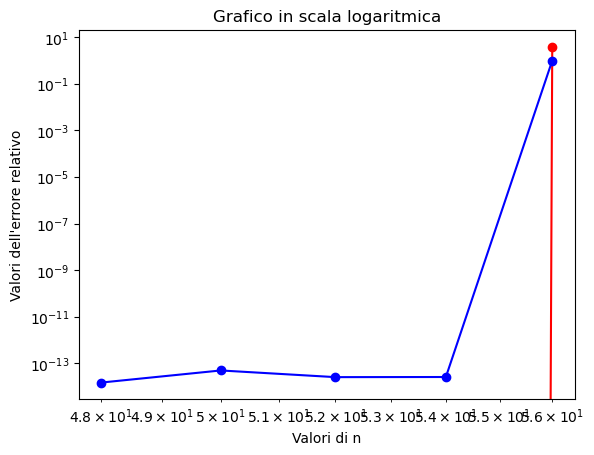

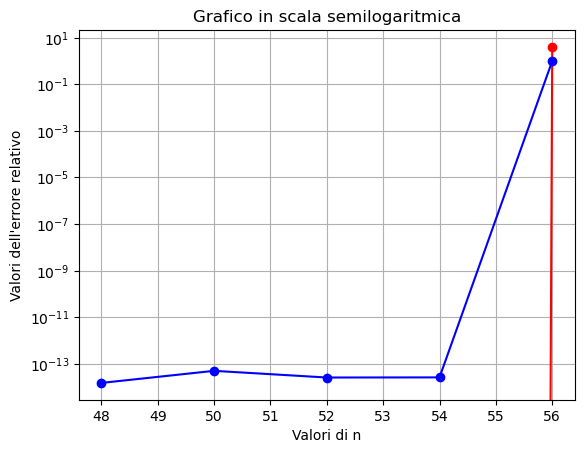

In [142]:
# SOLUZIONE GENERALE:
nv = np.arange(48,58,2)
errLU = []
errQR = []
for n in nv:
    
    # Creazione della matrice:
    A = create_matrix(n)
    # print("Matrice di Hankel:\n",A)
    
    # Creazione del termine noto:
    b = np.sum(A, axis = 1).reshape(n, 1)
    # print(b)
    
    # Metodo di fattorizzazione LU:
    PT,L,U = spl.lu(A)
    P = PT.T.copy()
    xLU, flag = LUSolve(P,L,U,b)
    # print("Soluzione con il metodo LU:\n", xLU)
    
    # Metodo di fattorizzazione QR:
    Q,R =spl.qr(A)
    xQR = QRSolve(Q,R,b)
    # print("Soluzione col metodo QR:\n", xQR)
    
    # Calcolo soluzione esatta:
    x = spl.solve(A,b)
    # print("Soluzione esatta:\n",x)
    
    # Calcolo errore relativo metodo LU:
    errore_soluzioneLU = npl.norm(xLU - x, np.inf)/npl.norm(x, np.inf)
    errLU.append(errore_soluzioneLU)
    print("Errore relativo LU:\n", errore_soluzioneLU)
    
    # Calcolo errore relativo metodo QR:
    errore_soluzioneQR = npl.norm(xQR - x, np.inf)/npl.norm(x, np.inf)
    errQR.append(errore_soluzioneQR)
    print("Errore relativo QR:\n", errore_soluzioneQR)
    
# Stampo i grafici degli errori:
plt.loglog(nv, errLU, '-or')
plt.loglog(nv, errQR, '-ob')
plt.xlabel("Valori di n")
plt.ylabel("Valori dell'errore relativo")
plt.title("Grafico in scala logaritmica")
plt.show()

plt.semilogy(nv, errLU, '-or')
plt.semilogy(nv, errQR, '-ob')
plt.grid(True)
plt.xlabel("Valori di n")
plt.ylabel("Valori dell'errore relativo")
plt.title("Grafico in scala semilogaritmica")
plt.show()

In [134]:
# Si osserva che il metodo di fattorizzazione LU porta ad una precisione maggiore, man mano che si aumentano le dimensioni della matrice
# fino ad arrivare ad un valore nullo di errore per n (dimensione della matrice) compresa fra 48 e 58
# Quando gli elementi sulla diagonale sono valori costanti (in questo caso tutti 1) allora il metodo LU risulta stabile e non produce
# errori relativi significativi.
# Il metodo LU presenta un errore relativo elevato solamente per n = 56
# Il metodo QR potrebbe dare errori per quanto riguarda delle approssimazioni durante la fattorizzazione

# ----------------------------------------------------------------------------------------------------------

## Metodi iterativi di Jacobi, Guass-Seidel e Gausseidel_SOR per la soluzione numerica di un sistema lineare

## Esercizio 9
Implementare la  funzione $jacobi(A,b,x0,toll,itmax)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Jacobi. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

## Esercizio 10
Implementare la  funzione $gauss$_$seidel(A,b,x0,toll,it_max)$ per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel. 
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

## Esercizio 11
Testare i metodi di Jacobi e di Gauss Seidel nella soluzione dei sistemi lineare Ax=b, dove 
- A=np.array([[4,1,3],[3,4,1],[1,1,17]]) 
- A=np.array([[3,0, 4],[7, 4, 3],[-1, -1 ,-2]])
- A=np.array([[5, 0, -1, 2],[ -2, 4, 1, 0],[0, -1, 4, -1],[ 2, 0, 0, 3]])

ed il termine noto del sistema è scelto in maniera tale che la soluzione esatta del sistema sia il vettore fatto da tutti 1.
Visualizzare in un grafico in scala logaritmica  l'errore per ogni iterazione per ciascun metodo. Cosa si osserva?
Porre toll=1e-8 it_max=500 e x0=np.zeros(A.shape[0]

## Esercizio 12
Implementare la  funzione $gauss$_$seidel$_sor(A,b,x0,omega, toll,itmax) per risolvere il  sistema lineare Ax=b utilizzando il Metodo iterativo di Gauss-Seidel-SOR
La funzione prende in input:
- A: matrice dei coefficienti
- b: termine noto
- x0: vettore iniziale della stessa dimensione di b
- omega: il parametro di rilassamento
- toll: tolleranza per il criterio di arresto
- itmax: iterazioni massime oltre le quali il metodo si ferma

Restituisce in output
- la soluzione x
- l'errore ad ogni iterazione calcolato come $||x^{(k)}-x^{(k-1)}||/||x^{(k)}||$

Calcolare il raggio spettrale della matrice di iterazione.

Implementare un criterio di arresto per il procedimento iterativo in termini di : $||x^{(k)}-x^{(k-1)}||/||x^{(k)}|| <toll$

## Esercizio 13
Scrivere una funzione creaPoisson(n) che preso in input l'ordine della matrice quadrata di Poisson la costruzione secondo la seguente formula:
$$A =
\left [
\begin{array}{ccccccccccc}
4 & -1 & 0 & -1 &0 &0 & 0& 0& \cdots &   0 & 0\\
-1 & 4 & -1 & 0  &-1 &0 & 0& 0& \cdots &   0 & 0\\
0 & -1 & 4 & -1  &0 &-1 & 0& 0& \cdots &   0 & 0 \\
-1 & 0 & -1 & 4  &-1 &0  & -1 & 0& \cdots &   0 & 0\\
0 & -1 & 0 & -1  & 4 &-1 & 0 & -1& \cdots &   0 & 0\\
0 & 0 & -1 & 0  & -1 &4 & -1 & 0&  -1 & 0 & 0 \\
0 & 0 & 0 & \ddots  & 0 &\ddots & \ddots & \ddots& \ddots & \ddots & 0\\
0 & 0 & 0 & 0  & -1 &0  & -1 & 4& -1 &   0& -1\\
\end{array}
 \right ], \qquad
$$
- Risolvere il sistema lineare Ax=b con matrice dei coefficienti A di Poisson di ordine 10 e termine noto b scelto in maniera tale che il sistema abbia soluzione il vettore x con tutte le componenti  uguali ad 1, utilizzando  il metodo iterativo di Jacobi, Gauss-Seidel e Gauss-Seidel-Sor con parametro omega scelto tra 1 e 2 in maniera tale che il raggio spettrale della matrice di iterazione sia il più piccolo possibile e confrontare su un unico grafico l'andamento degli errori in scala logaritmica. Usare toll=1e-10.